Using the SDSS catalogue define an environment metric and compute it for each galaxy in your sample. You can then address the question:
#### Are the physical properties of galaxies affected by the local galaxy density?
HINTS: How do we calculate the distance of a galaxy from every other galaxy in the SDSS catalogue in python/astropy?

In [5]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import FK5, SkyCoord
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u
from tqdm import tqdm

In [5]:
data = Table.read('SDSS_LAB2024_photometry_short.fits')

When computing the local environment it is common to define: A Primary galaxy (the one you are computing the local density for), the Neighbours sample (all the other galaxies that contribute to the environment metrics)

In [6]:
Nneigh = np.zeros_like(data['ra'])
AP_radius = 500 #kpc
DV_cut    = 1000 #km/s

NEIcoords = SkyCoord(ra=data['ra']*u.deg, dec=data['dec']*u.deg)

for gal in tqdm(range(len(data['id']))):

    PRIcoords = SkyCoord(ra=data['ra'][gal]*u.deg, dec=data['dec'][gal]*u.deg)
    PRIredshift = data['redshift'][gal]
    
    #Obtain a separation of all galaxies from the primary and convert to arcsec
    Separation = NEIcoords.separation(PRIcoords).to(u.arcsec)

    #Kpc to arcsec and obtain a Separation in Kpc
    arcsec_per_kpc = cosmo.arcsec_per_kpc_proper(PRIredshift)
    Separation_kpc = Separation.value/arcsec_per_kpc.value

    #Evaluate separation in redshift space
    deltav = np.abs(3e5*(data['redshift']-PRIredshift)/(1+PRIredshift))

    #Define the selection conditions
    condition =  (Separation_kpc>0) & (Separation_kpc<AP_radius) & (deltav<DV_cut)
    
    #Save the number of galaxies satisfying the selections. Please note these values do not include the primary galaxy.
    Nneigh[gal] = condition.sum()


100%|████████████████████████████████████| 10637/10637 [00:33<00:00, 319.06it/s]


In [7]:
#Turn the number of galaxies into a surface density of galaxies.
Dens_05 = Nneigh/(np.pi*0.5**2)

In [8]:
tabout = Table((data['id'], Dens_05), names=('id', 'dens_05'))
tabout.write('SDSS_env.fits', overwrite=True)

In [6]:
import pandas
#Lettura dati da SDSS_env.fits
data= Table.read("SDSS_env.fits",format="fits")
data= data.to_pandas()
dens= np.array(data.loc[:,"dens_05"])



In [7]:
print(dens)
valore_massimo = np.max(dens)

print("Il valore massimo nel vettore è:", valore_massimo)

[ 2.54647909 11.4591559   1.27323954 ...  2.54647909  8.91267681
  0.        ]
Il valore massimo nel vettore è: 132.41691265245692


In [8]:
#Lettura dati da results.fits
data= Table.read("results.fits",format="fits")
data= data.to_pandas()
mass= np.array(data.loc[:,"best.stellar.m_star"])
sfr= np.array(data.loc[:,"bayes.sfh.sfr10Myrs"])
sfr_err= np.array(data.loc[:,"bayes.sfh.sfr10Myrs_err"])

In [18]:

valore_massimo = np.max(mass)
valore_minimo = np.min(mass)
valore_medio = np.mean(mass)

print("Il valore massimo nel vettore è:", valore_massimo)
print("Il valore minimo nel vettore è:", valore_minimo)
print("Il valore medio nel vettore è:", valore_medio)

Il valore massimo nel vettore è: 428106214663.472
Il valore minimo nel vettore è: 27.39112221551807
Il valore medio nel vettore è: 7043881227.918893


In [19]:

valore_massimo = np.max(sfr)
valore_minimo = np.min(sfr)
valore_medio = np.mean(sfr)

print("Il valore massimo nel vettore è:", valore_massimo)
print("Il valore minimo nel vettore è:", valore_minimo)
print("Il valore medio nel vettore è:", valore_medio)

Il valore massimo nel vettore è: 106.05829258350326
Il valore minimo nel vettore è: 4.829818623198745e-07
Il valore medio nel vettore è: 1.6837831821741596


In [10]:
#Lettura dati da SDSS_LAB2024_photometry_short.fits
data= Table.read("SDSS_LAB2024_photometry_short.fits",format="fits")
data= data.to_pandas()
ra= np.array(data.loc[:,"ra"])
dec= np.array(data.loc[:,"dec"])

In [11]:
valore_massimo = np.max(dec)

print("Il valore massimo nel vettore è:", valore_massimo)

Il valore massimo nel vettore è: 34.9987488


[]

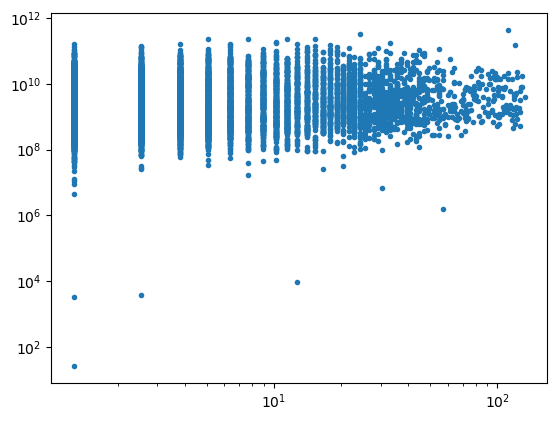

In [12]:
import matplotlib.pyplot as plt
plt.scatter(dens,mass,marker=".")
plt.loglog()

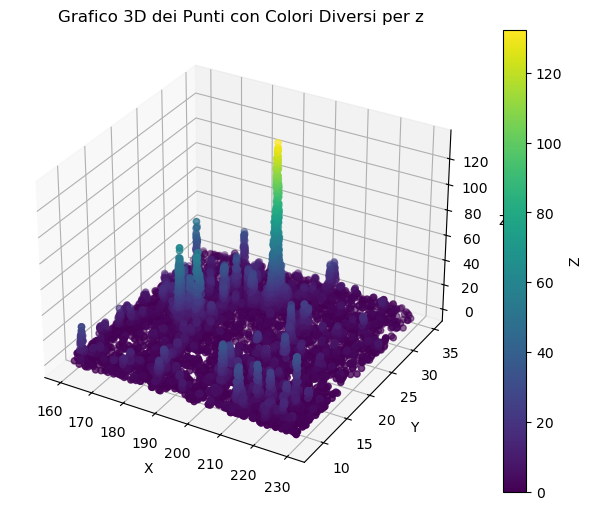

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_colored_points(x, y, z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title('Grafico 3D dei Punti con Colori Diversi per z')
    plt.colorbar(sc, label='Z')
    plt.show()

# Esempio di coordinate casuali
x = ra
y = dec
z = dens

draw_3d_colored_points(x, y, z)


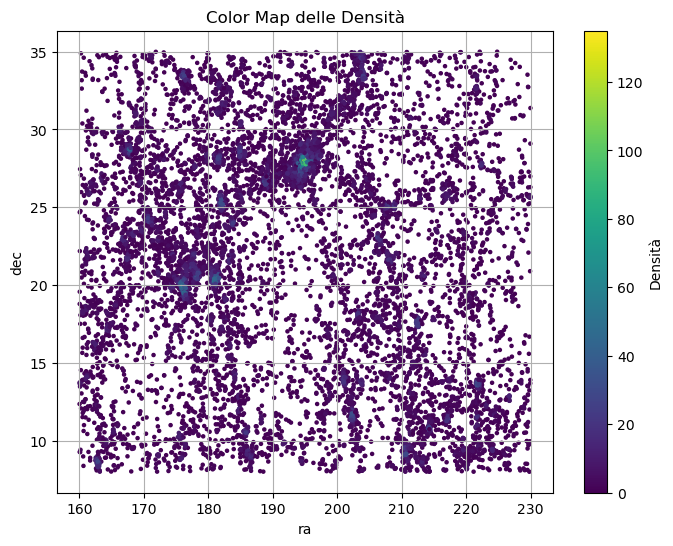

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def draw_colormap(coords_x, coords_y, densities):
    plt.figure(figsize=(8, 6))
    plt.scatter(coords_x, coords_y, c=densities, s=5, cmap='viridis', vmin=0, vmax=135)
    plt.colorbar(label='Densità')
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('Color Map delle Densità')
    plt.grid(True)
    plt.show()

# dati 
coords_x = ra
coords_y = dec
densities = dens

draw_colormap(coords_x, coords_y, densities)

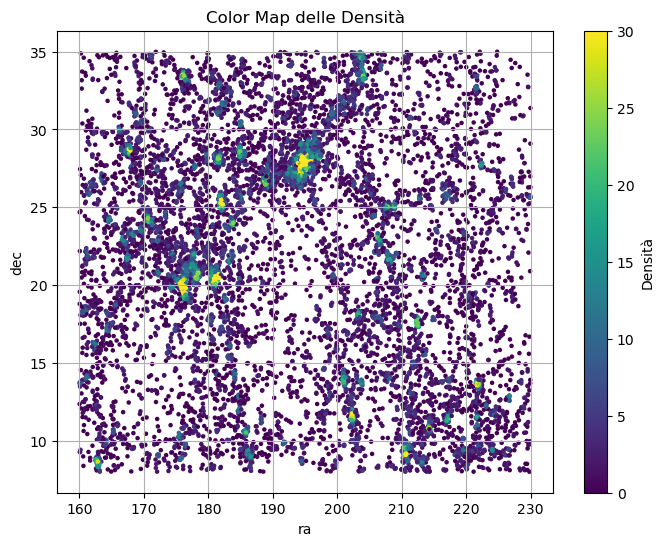

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def draw_colormap(coords_x, coords_y, densities):
    plt.figure(figsize=(8, 6))
    plt.scatter(coords_x, coords_y, c=densities, s=5, cmap='viridis', vmin=0, vmax=30)
    plt.colorbar(label='Densità')
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('Color Map delle Densità')
    plt.grid(True)
    plt.show()

# dati 
coords_x = ra
coords_y = dec
densities = dens

draw_colormap(coords_x, coords_y, densities)

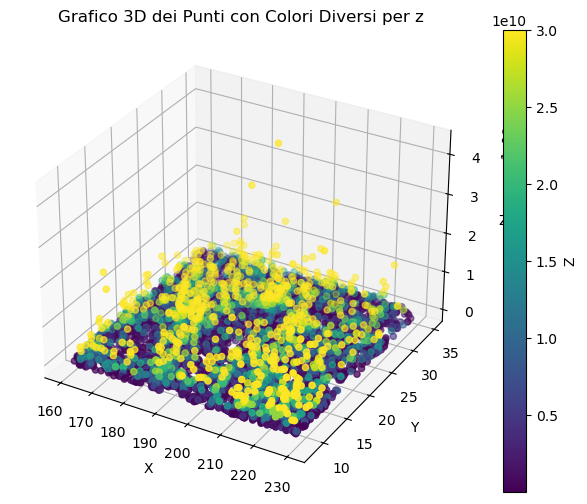

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_colored_points(x, y, z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', vmin=25, vmax=30000000000)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title('Grafico 3D dei Punti con Colori Diversi per z')
    plt.colorbar(sc, label='Z')
    plt.show()

# Esempio di coordinate casuali
x = ra
y = dec
z = mass

draw_3d_colored_points(x, y, z)


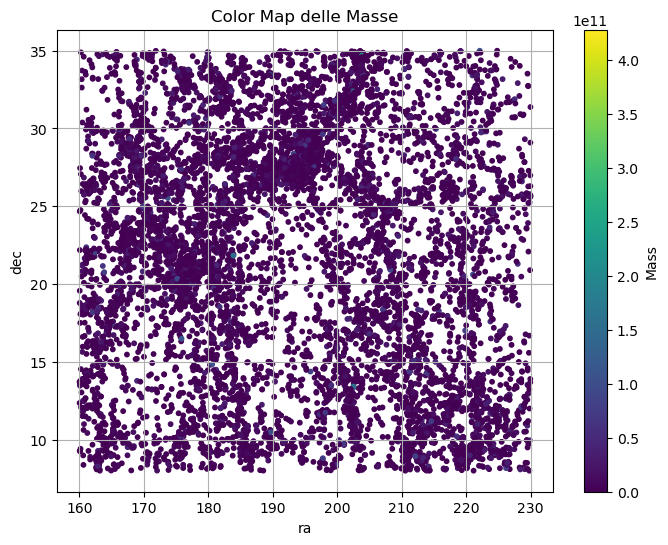

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def draw_colormap(coords_x, coords_y, densities):
    plt.figure(figsize=(8, 6))
    plt.scatter(coords_x, coords_y, c=densities, s=10, cmap='viridis', vmin=25, vmax=428106214664)
    plt.colorbar(label='Mass')
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('Color Map delle Masse')
    plt.grid(True)
    plt.show()

# dati 
coords_x = ra
coords_y = dec
densities = mass

draw_colormap(coords_x, coords_y, densities)

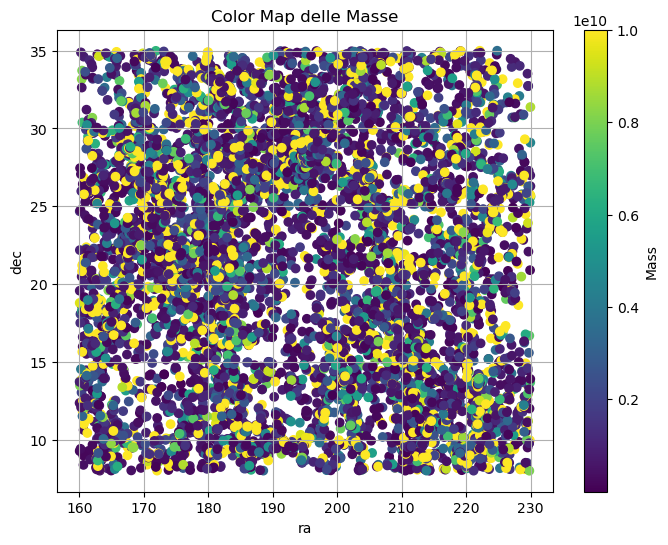

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def draw_colormap(coords_x, coords_y, densities):
    plt.figure(figsize=(8, 6))
    plt.scatter(coords_x, coords_y, c=densities, cmap='viridis', vmin=25, vmax=10000000000)
    plt.colorbar(label='Mass')
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('Color Map delle Masse')
    plt.grid(True)
    plt.show()

# dati 
coords_x = ra
coords_y = dec
densities = mass

draw_colormap(coords_x, coords_y, densities)

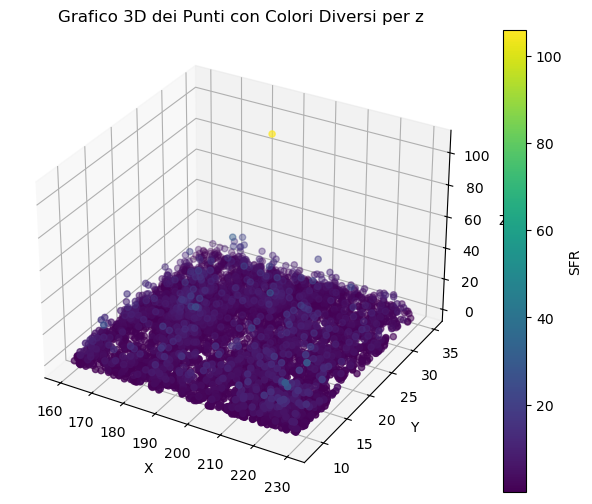

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_colored_points(x, y, z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title('Grafico 3D dei Punti con Colori Diversi per z')
    plt.colorbar(sc, label='SFR')
    plt.show()

# Esempio di coordinate casuali
x = ra
y = dec
z = sfr

draw_3d_colored_points(x, y, z)


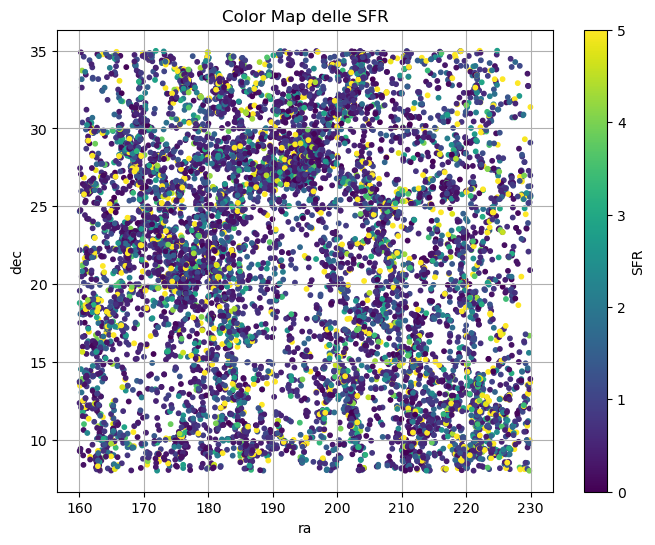

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def draw_colormap(coords_x, coords_y, densities):
    plt.figure(figsize=(8, 6))
    plt.scatter(coords_x, coords_y, c=densities, s=10, cmap='viridis', vmin=0, vmax=5)
    plt.colorbar(label='SFR')
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('Color Map delle SFR')
    plt.grid(True)
    plt.show()

# dati 
coords_x = ra
coords_y = dec
densities = sfr

draw_colormap(coords_x, coords_y, densities)